In [263]:
import numpy as np
import matplotlib.pyplot as plt

In [264]:
# define coorinate points
p0 = [149.4, 129.4]
p1 = [149.4, 80.6]
p2 = [100.6, 80.6]
p3 = [100.6, 129.4]

In [265]:
def getAngle(current, next):
    x = next[0] - current[0]
    y = next[1] - current[1]
    angle = np.arctan2(y, x)
    angle = np.rad2deg(angle)
    return angle

In [266]:
# evaluate angles
angle0 = getAngle(p0, p1)
angle1 = getAngle(p1, p2)
angle2 = getAngle(p2, p3)
angle3 = getAngle(p3, p0)

print(angle0)
print(angle1)
print(angle2)
print(angle3)

print("Normalized angles:")
angle0 = np.mod(angle0, 360)
angle1 = np.mod(angle1, 360)
angle2 = np.mod(angle2, 360)
angle3 = np.mod(angle3, 360)

print(angle0)
print(angle1)
print(angle2)
print(angle3)


-90.0
180.0
90.0
0.0
Normalized angles:
270.0
180.0
90.0
0.0


(25.0, 135.0, 25.0, 135.0)

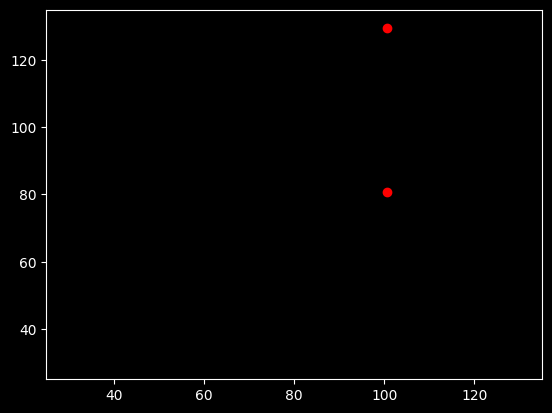

In [267]:
# plot points
x = [p0[0], p1[0], p2[0], p3[0]]
y = [p0[1], p1[1], p2[1], p3[1]]
plt.plot(x, y, 'ro')
plt.axis([25, 135, 25, 135])

In [268]:
def calcAngle(x0, y0, x1, y1):
    newAngle = np.arctan2((y1-y0),(x1-x0))
   
    # convert to degrees
    newAngle = np.rad2deg(newAngle)
    
    # normalize angle
    newAngle = np.mod(newAngle, 360)
    
    return newAngle

In [269]:
print(calcAngle(p0[0], p1[0], p0[1], p1[1]))

253.790975072192


In [270]:
a = calcAngle(0, 0, 100, 100)
print(a)

45.0


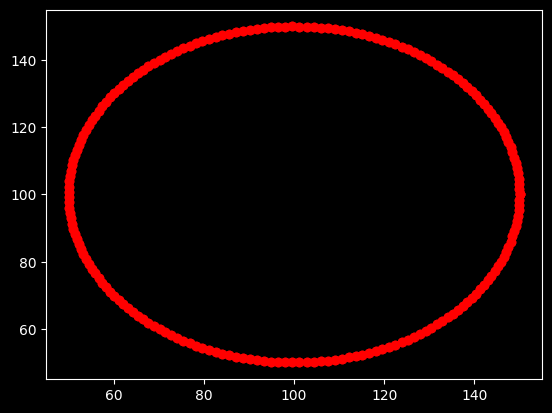

In [271]:
# Export a string with G1 Xcoords Ycoords Fspeed and Aangle for X and Y coords on a circle

# define coorinate points
radius = 50
n = 200

# linspace for cirlce radius
s = radius
a = np.linspace(0, 2*np.pi, n)
# traspose a
a_t = np.flip(a)

#combine a and a_t
a = np.concatenate((a, a_t), axis=0)

aabs = 0
x = s*np.cos(a)
y = s*np.sin(a)

# offset points
x0 = 100
y0 = 100

x = x + x0
y = y + y0

# plot points
plt.plot(x, y, 'ro')

# delete circle.txt file
import os
if os.path.exists("circle.txt"):
    os.remove("circle.txt")

# turn on a laser
with open("circle.txt", "a") as myfile:
    myfile.write("M106 P4 S1")
    myfile.write("\n")
    myfile.close()

# for each angle create string
for i in range(len(x)-1):
    i+= 1

    aabs += a[i]-a[i-1]
    if(i == a.shape[0]/2):
        string = ("M106 P4 S0\nM106 P2 S1")
        with open("circle.txt", "a") as myfile:
            myfile.write(string)
            myfile.write("\n")

    string = ("G1 X" + str(x[i]) + " Y" + str(y[i]) + " F1800 A" + str(np.rad2deg(aabs)))
    
    # save string to file
    with open("circle.txt", "a") as myfile:
        myfile.write(string)
        myfile.write("\n")
with open("circle.txt", "a") as myfile:
        myfile.write("M106 P2 S0")
        myfile.write("\n")

0.0

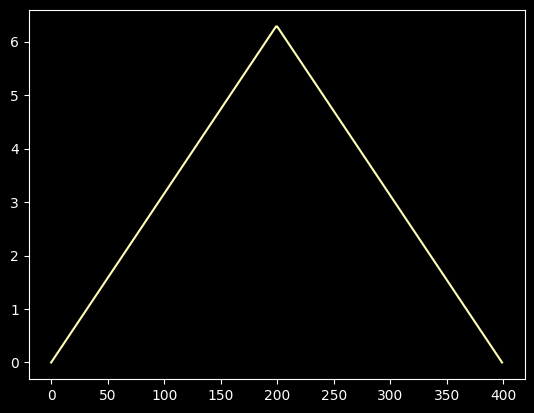

In [272]:
plt.plot(aabs)
plt.plot(a)

aabs


In [273]:
print(a.shape)

(400,)
